# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

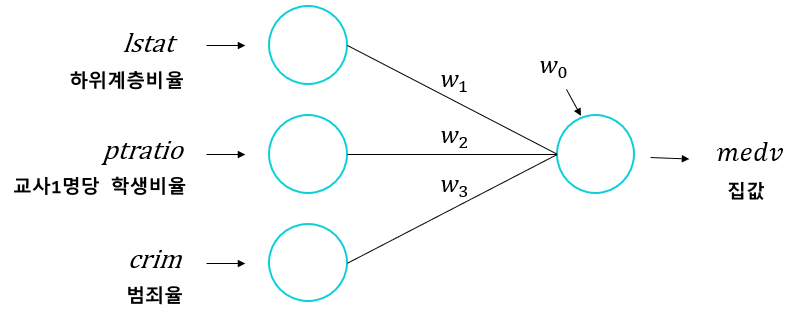

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [5]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [6]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [18]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential([Input(shape = (nfeatures,)), Dense(1)])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [26]:
model.compile(optimizer = 'adam', loss = 'mse')

In [20]:
model.fit(x_train, y_train)
pred = model.predict(x_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 570.9170  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [27]:
history = model.fit(x_train, y_train, epochs = 60, validation_split=0.2).history

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 518.6174 - val_loss: 591.0833
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 512.7953 - val_loss: 590.2252
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 519.9691 - val_loss: 589.3856
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 549.4940 - val_loss: 588.5290
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 515.7061 - val_loss: 587.6727
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 534.5500 - val_loss: 586.8273
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 574.7574 - val_loss: 585.9819
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 534.5030 - val_loss: 585.1541
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 500.0617 - val_loss: 584.3014
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 517.1075 - val_loss: 583.4467
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 491.0416 - val_loss: 582.6038
Epoch 12/60
11/11 ━━━━━━━━━━━

* 학습결과 그래프

In [22]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

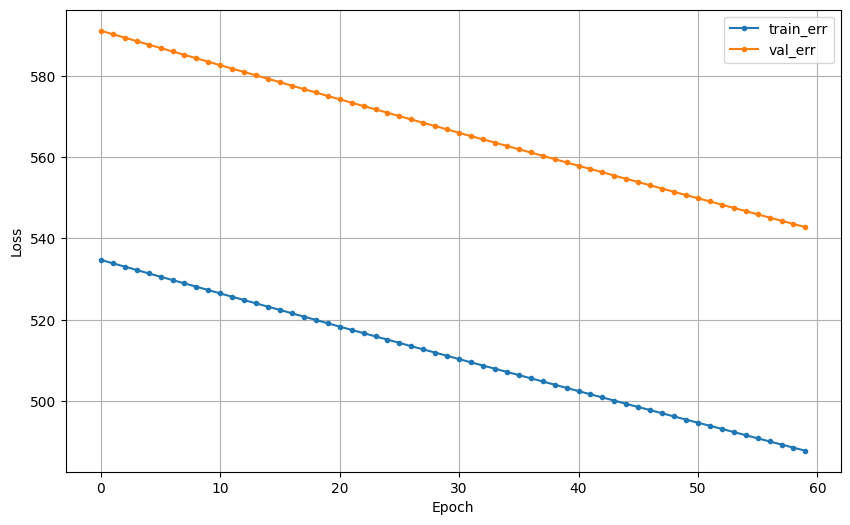

In [28]:
dl_history_plot(history)

### (3) 예측 및 검증

In [24]:
pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [25]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 21.720463741577074
MAE  : 20.076635521767184
MAPE : 0.9112454598035971


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [29]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [30]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [31]:
nfeatures = x_train.shape[1]
nfeatures

12

In [32]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )), Dense(1)])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [52]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [53]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 361.7414 - val_loss: 306.7797
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 230.0985 - val_loss: 226.9837
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 167.4099 - val_loss: 191.3483
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 146.6605 - val_loss: 171.5612
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.4919 - val_loss: 154.2088
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128.6102 - val_loss: 138.4750
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112.8185 - val_loss: 124.3126
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.4170 - val_loss: 112.8412
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.6865 - val_loss: 102.7270
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 104.5771 - val_loss: 93.4728
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.7095 - val_loss: 85.7826
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━

* 학습결과 그래프

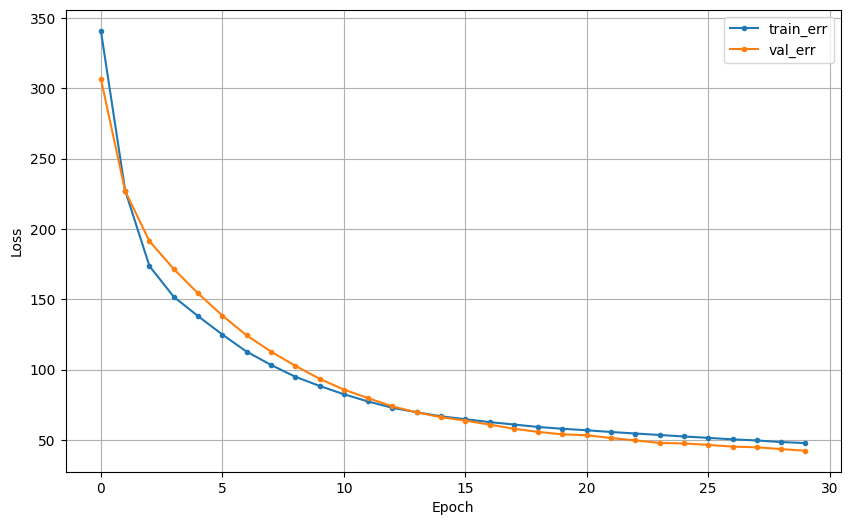

In [54]:
dl_history_plot(history)

* 예측 및 평가

In [57]:
pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [58]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 6.079966279039291
MAE  : 4.59939355289235
MAPE : 0.2321700628692962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

* compile

* 학습

* 학습결과 그래프

* 예측 및 평가

----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [75]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [76]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [77]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [78]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Input(shape = (nfeatures,)),
                     Dense(2, activation = 'relu'),
                     Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [79]:
model3.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [81]:
result = model3.fit(x_train, y_train, epochs = 50, validation_split = .2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 94.5886 - val_loss: 99.2967
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.4036 - val_loss: 99.2007
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 83.1944 - val_loss: 99.2024
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 86.5870 - val_loss: 99.2453
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 105.8102 - val_loss: 99.2541
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79.1539 - val_loss: 99.2237
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 84.3471 - val_loss: 99.2390
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 84.1859 - val_loss: 99.2688
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 83.5970 - val_loss: 99.2233
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 86.8947 - val_loss: 99.1050
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.1934 - val_loss: 99.0760
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

* 학습결과 그래프

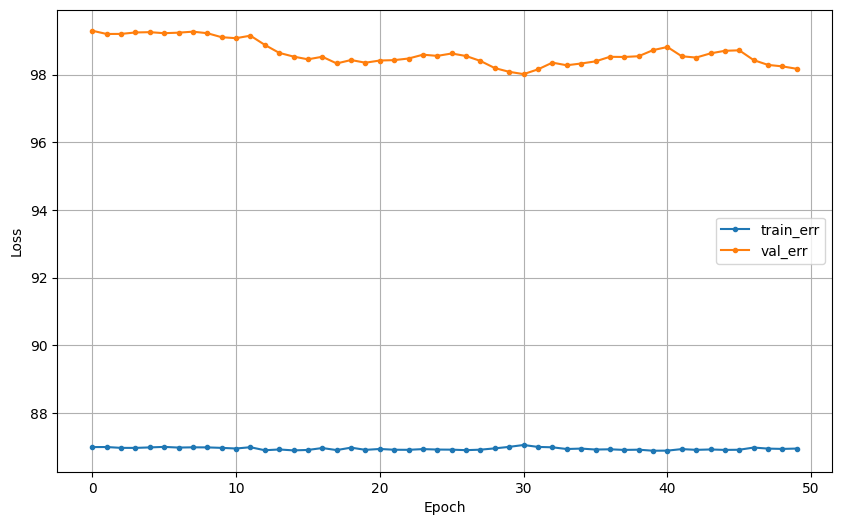

In [82]:
dl_history_plot(result)

* 예측 및 평가

In [69]:
pred3 = model.predict(x_val)
mean_absolute_percentage_error(y_val, pred3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.2321700628692962

### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [105]:
nfeatures = x_train.shape[1]
nfeatures

12

In [83]:
clear_session()

model4 = Sequential([Input(shape = (12,)),
                     Dense(2, activation = 'relu'),
                     Dense(1)   ])

* 컴파일 + 학습

In [85]:
model4.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse' )

* 학습곡선

In [87]:
result = model.fit(x_train, y_train, epochs = 50, validation_split = .2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 44.3535 - val_loss: 41.5043
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.0860 - val_loss: 40.3891
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.3974 - val_loss: 40.0996
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.2468 - val_loss: 39.1676
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.7677 - val_loss: 38.1992
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.0972 - val_loss: 38.2584
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.5727 - val_loss: 38.0196
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.0532 - val_loss: 36.4771
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.7091 - val_loss: 36.1877
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.7192 - val_loss: 35.4640
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.3470 - val_loss: 35.1437
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

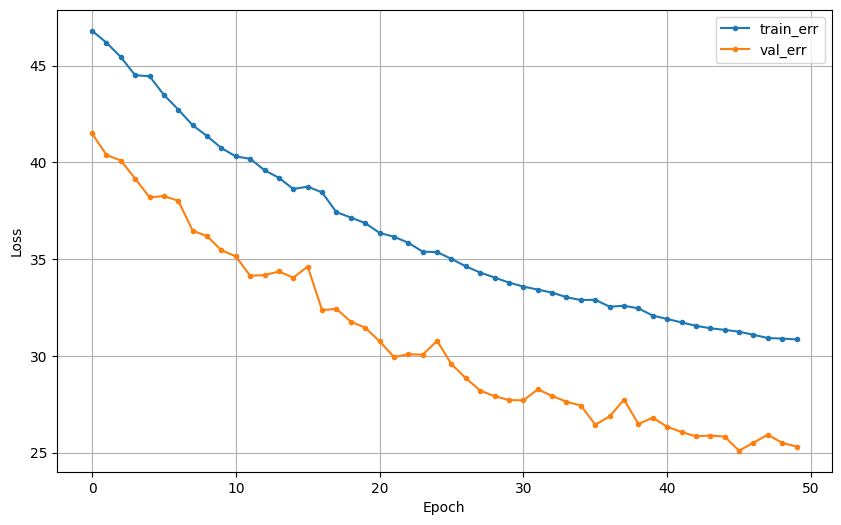

In [88]:
dl_history_plot(result)

* 검증

In [90]:
pred4 = model.predict(x_val)

mean_absolute_percentage_error(y_val, pred4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


0.19588723284586138

### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [95]:
model5 = Sequential([Input(shape = (12,)),
                    Dense(8, activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(1)])

* 컴파일 + 학습

In [99]:
model5.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

In [100]:
result = model5.fit(x_train, y_train, epochs =  50, validation_split = .2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 386.7855 - val_loss: 201.1549
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149.5213 - val_loss: 95.5123
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.6309 - val_loss: 70.8032
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.4043 - val_loss: 44.8967
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.5940 - val_loss: 45.2946
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.1289 - val_loss: 36.5777
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.8070 - val_loss: 32.6840
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.5109 - val_loss: 27.7964
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.3760 - val_loss: 20.6826
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.0794 - val_loss: 21.9391
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.8697 - val_loss: 23.6194
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

* 학습곡선

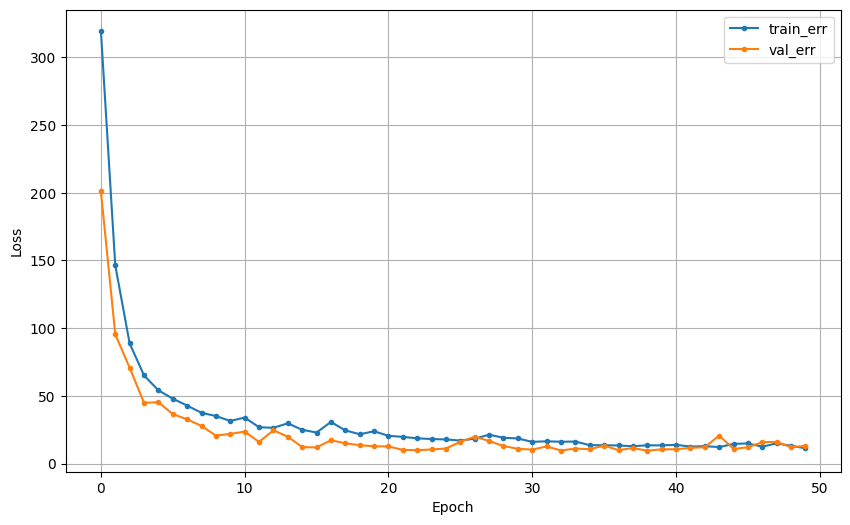

In [101]:
dl_history_plot(result)

* 검증

In [103]:
pred5 = model.predict(x_val)

mean_absolute_percentage_error(y_val, pred5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


1.0314011498304945

* 회귀 모델 예측값 vs 실제값 그래프

In [109]:
def visualization_result(y_val,pred):
    plt.figure(figsize = (5,5))
    y = x = np.linspace(y_val.min(), y_val.max(), 10)

    y_range = y_val.max() - y_val.min()
    mi, ma = y_val.min() - y_range*0.1 , y_val.max()+ y_range*0.1

    sns.scatterplot(x= pred.reshape(-1), y = y_val.values)
    sns.lineplot(x = x, y = y, color = 'r')
    plt.xlim(mi, ma)
    plt.ylim(mi, ma)
    plt.grid()

    plt.show()

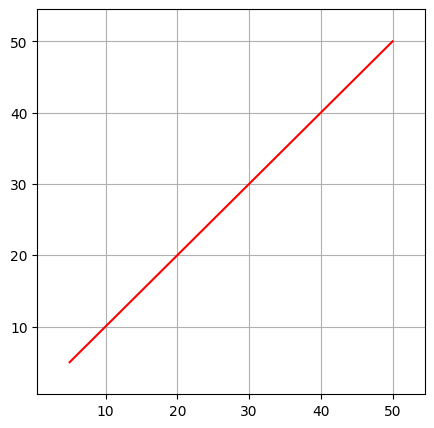

In [110]:
visualization_result(y_val,pred5)